In [ ]:
import numpy as np

# Generate sine wave data
x = np.linspace(0, 50, 500)  # 500 points from 0 to 50
y = np.sin(x)

# Create sequences of 5 consecutive values and their corresponding next 5 values
input_seq = []
target_seq = []

for i in range(len(y) - 10):
    input_seq.append(y[i:i+5])
    target_seq.append(y[i+5:i+10])

input_seq = np.array(input_seq)
target_seq = np.array(target_seq)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into 80% training and 20% testing
input_train, input_test, target_train, target_test = train_test_split(input_seq, target_seq, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, RepeatVector, TimeDistributed

model = Sequential([
    # Encoder
    SimpleRNN(50, activation='relu', input_shape=(5, 1)),
    RepeatVector(5),  # Set the output sequence length

    # Decoder
    SimpleRNN(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model.compile(optimizer='adam', loss='mse')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 repeat_vector (RepeatVecto  (None, 5, 50)             0         
 r)                                                              
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5, 50)             5050      
                                                                 
 time_distributed (TimeDist  (None, 5, 1)              51        
 ributed)                                                        
                                                                 
Total params: 7701 (30.08 KB)
Trainable params: 7701 (30.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Reshape the data to fit the RNN input shape
input_seq = input_seq.reshape((input_seq.shape[0], input_seq.shape[1], 1))
target_seq = target_seq.reshape((target_seq.shape[0], target_seq.shape[1], 1))

from sklearn.model_selection import train_test_split

# Splitting the data into 80% training and 20% testing
input_train, input_test, target_train, target_test = train_test_split(input_seq, target_seq, test_size=0.2, random_state=42)

# Train the model
model.fit(input_seq, target_seq, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200
13/13 [==============================] - 6s 88ms/step - loss: 0.3167 - val_loss: 0.1814
Epoch 2/200
13/13 [==============================] - 0s 16ms/step - loss: 0.0952 - val_loss: 0.0459
Epoch 3/200
13/13 [==============================] - 0s 22ms/step - loss: 0.0314 - val_loss: 0.0226
Epoch 4/200
13/13 [==============================] - 0s 19ms/step - loss: 0.0117 - val_loss: 0.0067
Epoch 5/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 6/200
13/13 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 8.6416e-04
Epoch 7/200
13/13 [==============================] - 0s 20ms/step - loss: 6.3042e-04 - val_loss: 5.4956e-04
Epoch 8/200
13/13 [==============================] - 0s 26ms/step - loss: 4.1175e-04 - val_loss: 3.0179e-04
Epoch 9/200
13/13 [==============================] - 0s 31ms/step - loss: 2.6791e-04 - val_loss: 2.0549e-04
Epoch 10/200
13/13 [==============================] - 0s 18ms/step - los

In [ ]:
# Predict the next 5 values for a given sequence
test_seq = np.array([np.sin(1), np.sin(1.1), np.sin(1.2), np.sin(1.3), np.sin(1.4)])
test_seq = test_seq.reshape((1, 5, 1))
predicted_seq = model.predict(test_seq)
print(predicted_seq)


1/1 [==============================] - 0s 427ms/step
[[[1.0082481 ]
  [1.017565  ]
  [1.0167713 ]
  [1.0012445 ]
  [0.98034436]]]


In [ ]:
# Let's take a sample from our dataset for comparison
sample_indices = np.random.choice(len(input_seq), 5)  # Taking 5 random samples for demonstration

for idx in sample_indices:
    test_seq = input_seq[idx]
    actual_output = target_seq[idx]
    predicted_output = model.predict(test_seq.reshape(1, 5, 1))

    print("Input Sequence:", test_seq.flatten())
    print("Actual Output:", actual_output.flatten())
    print("Predicted Output:", predicted_output.flatten())
    print("------")


1/1 [==============================] - 0s 42ms/step
Input Sequence: [0.9999603  0.99583596 0.98172167 0.95775903 0.9241884 ]
Actual Output: [0.88134658 0.82966333 0.76965713 0.70192994 0.62716119]
Predicted Output: [0.8937088  0.8481885  0.7976013  0.73154587 0.6625789 ]
------
1/1 [==============================] - 0s 34ms/step
Input Sequence: [-0.52626584 -0.43856625 -0.34646709 -0.25089226 -0.15280055]
Actual Output: [-0.05317599  0.04698201  0.14666871  0.24488407  0.34064281]
Predicted Output: [-0.04673801  0.05307145  0.15191789  0.25050598  0.35133278]
------
1/1 [==============================] - 0s 41ms/step
Input Sequence: [0.91243838 0.94879656 0.97563667 0.99268947 0.99978387]
Actual Output: [0.99684873 0.98391347 0.96110787 0.9286607  0.88689747]
Predicted Output: [1.0072684  1.002492   0.9864109  0.95687765 0.92053264]
------
1/1 [==============================] - 0s 35ms/step
Input Sequence: [-0.83282021 -0.88401542 -0.92634243 -0.95937664 -0.98278664]
Actual Output: [-0

In [ ]:
from sklearn.metrics import mean_squared_error

total_mse = 0
for idx in range(len(input_seq)):
    actual_output = target_seq[idx]
    predicted_output = model.predict(input_seq[idx].reshape(1, 5, 1))
    mse = mean_squared_error(actual_output.flatten(), predicted_output.flatten())
    total_mse += mse

average_mse = total_mse / len(input_seq)
print("Average MSE:", average_mse)


1/1 [==============================] - 0s 34ms/step
Average MSE: 0.00018121575148732474


1/1 [==============================] - 0s 38ms/step


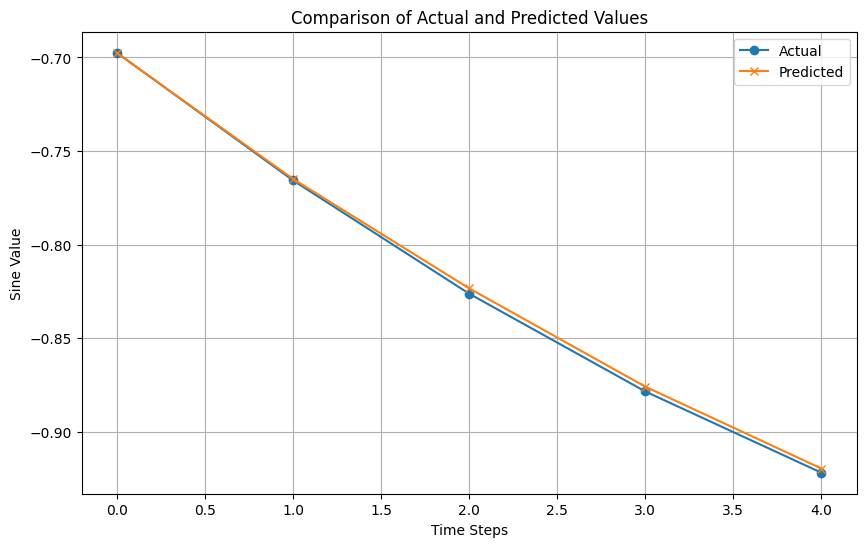

In [ ]:
import matplotlib.pyplot as plt

# For demonstration, let's take a random sample from our dataset
idx = np.random.choice(len(input_seq))
test_seq = input_seq[idx]
actual_output = target_seq[idx]
predicted_output = model.predict(test_seq.reshape(1, 5, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.arange(5), actual_output.flatten(), 'o-', label='Actual')
plt.plot(np.arange(5), predicted_output.flatten(), 'x-', label='Predicted')
plt.legend()
plt.title("Comparison of Actual and Predicted Values")
plt.xlabel("Time Steps")
plt.ylabel("Sine Value")
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 30ms/step


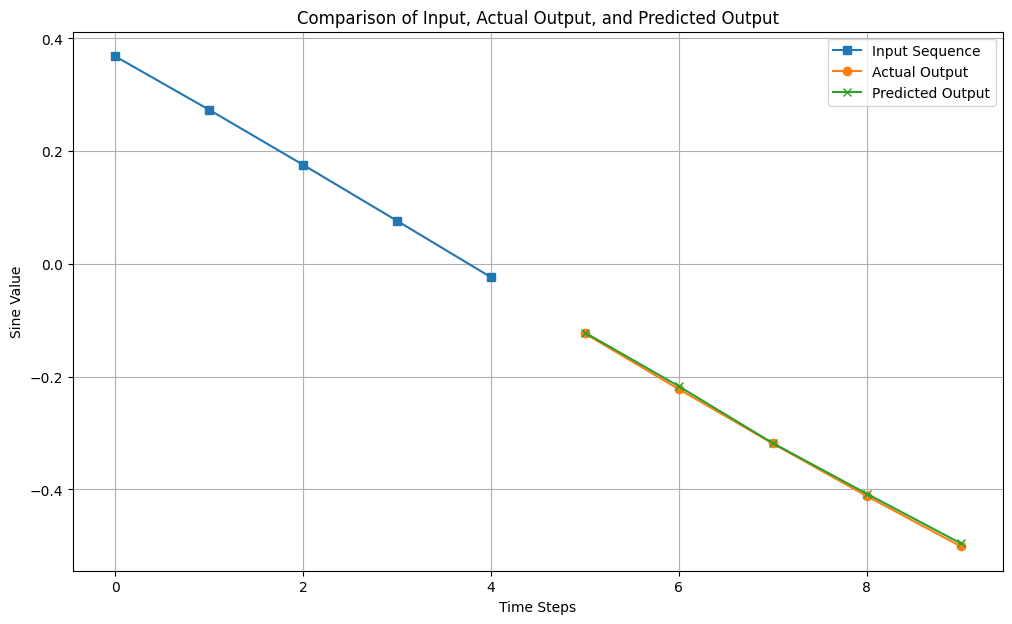

In [ ]:
import matplotlib.pyplot as plt

# For demonstration, let's take a random sample from our dataset
idx = np.random.choice(len(input_seq))
test_seq = input_seq[idx]
actual_output = target_seq[idx]
predicted_output = model.predict(test_seq.reshape(1, 5, 1))

# Plotting
plt.figure(figsize=(12, 7))

# Plotting the input sequence
plt.plot(np.arange(5), test_seq.flatten(), 's-', label='Input Sequence')

# Plotting the actual and predicted output
# We offset by 5 on the x-axis to place it after the input sequence
plt.plot(np.arange(5, 10), actual_output.flatten(), 'o-', label='Actual Output')
plt.plot(np.arange(5, 10), predicted_output.flatten(), 'x-', label='Predicted Output')

plt.legend()
plt.title("Comparison of Input, Actual Output, and Predicted Output")
plt.xlabel("Time Steps")
plt.ylabel("Sine Value")
plt.grid(True)
plt.show()


4/4 [==============================] - 0s 5ms/step


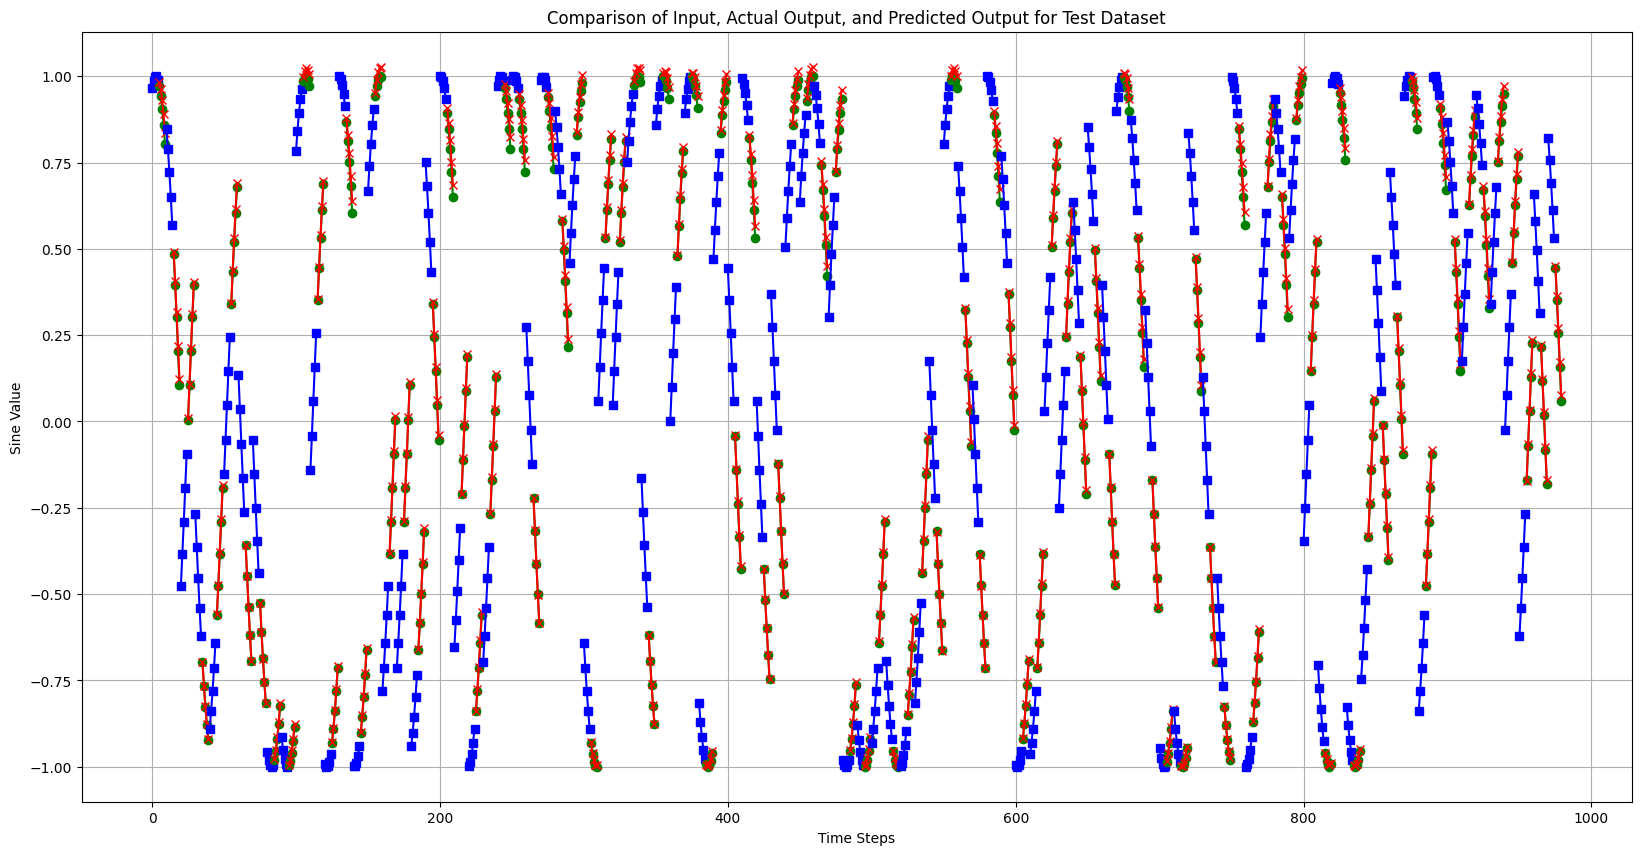

In [ ]:
import matplotlib.pyplot as plt

# Predicting for the entire test dataset
predicted_outputs = model.predict(input_test)

# Plotting
plt.figure(figsize=(20, 10))

for i in range(len(input_test)):
    # Plotting the input sequence
    plt.plot(np.arange(i*10, i*10+5), input_test[i].flatten(), 's-', color='blue')

    # Plotting the actual and predicted output
    # We offset by 5 on the x-axis to place it after the input sequence
    plt.plot(np.arange(i*10+5, i*10+10), target_test[i].flatten(), 'o-', color='green')
    plt.plot(np.arange(i*10+5, i*10+10), predicted_outputs[i].flatten(), 'x-', color='red')

plt.title("Comparison of Input, Actual Output, and Predicted Output for Test Dataset")
plt.xlabel("Time Steps")
plt.ylabel("Sine Value")
plt.grid(True)
plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 repeat_vector (RepeatVecto  (None, 5, 50)             0         
 r)                                                              
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5, 50)             5050      
                                                                 
 time_distributed (TimeDist  (None, 5, 1)              51        
 ributed)                                                        
                                                                 
Total params: 7701 (30.08 KB)
Trainable params: 7701 (30.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
